# Calculate the percent of datapoints dropped by manufacturer

In [1]:
import os
from os.path import join

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import pandas as pd

In [5]:
analysisDir = '../analysis/'

In [7]:
df = pd.read_table(join(analysisDir, 'allSubjs_calibrationSummary.tsv'), sep='\t')

In [10]:
df[:10]

,trial,ptIdx,percentValid,centX,centY,centDist,centAngle,RMS,subj,glasses,dist,offset,condition
0,1,15,0.992,872.513,456.424,0.683,48.041,0.113,101,Pupil Labs,1M,0deg,101_PupilLabs_1M_0deg
1,2,21,0.996,178.414,736.665,1.135,83.071,0.074,101,Pupil Labs,1M,0deg,101_PupilLabs_1M_0deg
2,3,3,0.992,529.483,128.252,0.564,52.494,0.114,101,Pupil Labs,1M,0deg,101_PupilLabs_1M_0deg
3,4,13,0.988,537.017,401.570,1.226,69.390,0.123,101,Pupil Labs,1M,0deg,101_PupilLabs_1M_0deg
4,5,25,0.992,862.071,709.513,1.481,76.933,0.087,101,Pupil Labs,1M,0deg,101_PupilLabs_1M_0deg
5,6,5,0.992,871.807,74.899,1.160,67.254,0.087,101,Pupil Labs,1M,0deg,101_PupilLabs_1M_0deg
6,7,1,0.992,183.395,78.256,1.049,79.286,0.085,101,Pupil Labs,1M,0deg,101_PupilLabs_1M_0deg
7,8,23,0.996,500.611,682.510,1.758,89.768,0.080,101,Pupil Labs,1M,0deg,101_PupilLabs_1M_0deg
8,9,11,0.992,146.555,442.042,0.715,109.137,0.203,101,Pupil Labs,1M,0deg,101_PupilLabs_1M_0deg
9,1,25,0.992,838.920,755.500,0.909,85.894,0.152,101,Pupil Labs,1M,10Ldeg,101_PupilLabs_1M_10Ldeg


In [18]:
# pull out percent valid for each of the different manufacturers
pl = df[df.glasses == 'Pupil Labs']['percentValid']
smi = df[df.glasses == 'SMI']['percentValid']
tobii = df[df.glasses == 'Tobii']['percentValid']

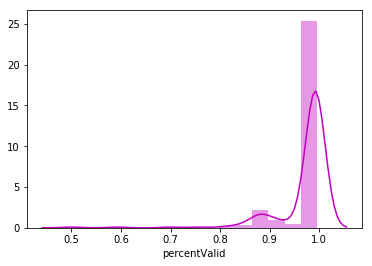

In [35]:
# take the log transform of the data
sns.distplot(pl, color='m')

In [37]:
from sklearn import preprocessing

In [39]:
pd_norm = (pl - pl.mean()) / (pl.max() - pl.min())

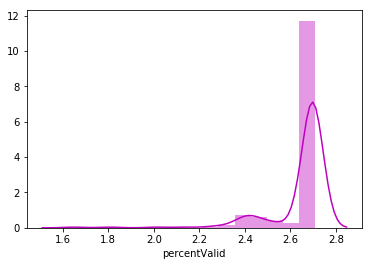

In [44]:
sns.distplot(np.exp(pl), color='m')

In [22]:
from scipy import stats

In [24]:
F, p = stats.f_oneway(pl, smi, tobii)
F

7.9340426163195534

In [25]:
p

0.00039030618815859611

In [26]:
import seaborn as sns

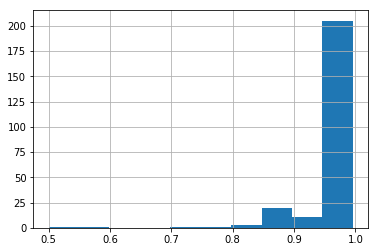

In [28]:
pl.hist()

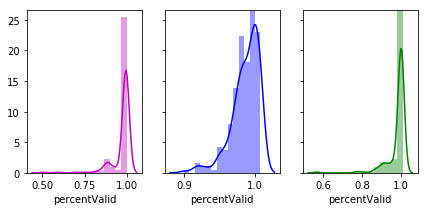

In [34]:
f, axes = plt.subplots(1,3, figsize=(7,3), sharey=True)

sns.distplot(pl, color='m', ax=axes[0])
sns.distplot(smi, color='b', ax=axes[1])
sns.distplot(tobii, color='g', ax=axes[2])